# Maps to support Pycnogen glider placement

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import h5py
import gsw
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
from haversine import haversine
import numpy.ma as ma
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import sys
from xgcm import Grid
from xgcm.autogenerate import generate_grid_ds

import importlib

sys.path.append("../SO12_analysis/") 

import plot_topView_contourf as topView

import scipy.io as scio

import cmocean.cm as cmo

# Read in model fields

In [4]:
grid = xr.open_dataset("/data/SOSE/SOSE/SO6/SETUP/grid.nc")
XC = grid.XC[0, :].values
XG = grid.XG[0, :].values
YC = grid.YC[:, 0].values
YG = grid.YG[:, 0].values
RC = grid.RC.values
RF = grid.RF.values


siatmFW = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_SIatmFW.nc")
siEMPMR = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_SIempmr.nc")
oceSflx = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_oceSflux.nc")
oceSPflx = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_oceSPflx.nc")
uvel = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_Uvel.nc", chunks={"time":72})
vvel = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_Vvel.nc", chunks={"time":72})
wvel = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_Wvel.nc", chunks={"time":72})
taux = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_oceTAUX.nc", chunks={"time":72})
tauy = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_oceTAUY.nc", chunks={"time":72})
strat = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_Strat.nc", chunks={"time":72})
theta = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_Theta.nc", chunks={"time":72})
salt = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_Salt.nc", chunks={"time":72})
pres = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_Pres.nc", chunks={"time":72})
SSH = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_SSH.nc", chunks={"time":72})

SIarea = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_SeaIceArea.nc")
fwflx = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_oceFWflx.nc")
siheff = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_SeaIceHeff.nc")
mld = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_MLD.nc")

taux = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_oceTAUX.nc")
tauy = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_oceTAUY.nc")

salt_advx = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_ADVx_SLT.nc")
salt_advy = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_ADVy_SLT.nc")
salt_advr = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_ADVr_SLT.nc")
salt_diffx = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_DFxE_SLT.nc")
salt_diffy = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_DFyE_SLT.nc")
salt_diffr = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_DFrI_SLT.nc")

#time_inner = np.diff(uvel.time)
time_inner = uvel.time[:-1] + np.diff(uvel.time)*0.5

ds = xr.Dataset(coords = {"XC":(["XC"], XC, {'axis': 'X'}), 
                              "XG":(["XG"], XG, {'axis': 'X', 'c_grid_axis_shift': -0.5}), 
                              "YC":(["YC"], YC, {'axis':"Y"}), 
                              "YG":(["YG"], YG, {'axis':'Y', 'c_grid_axis_shift': -0.5}),
                             "Z":(["Z"], RC, {'axis':"Z"}), 
                              "Zl":(["Zl"], RF[:-1], {'axis':'Z', 'c_grid_axis_shift': -0.5}),
                              "time":(["time"], uvel.time.values, {'axis': 'T'}),
                              "time_inner":(["time_inner"], time_inner.values, 
                                            {'axis': 'T', 'c_grid_axis_shift':0.5})})

ds = ds.assign_coords({"dxC" : xr.DataArray(grid.DXC.values, dims=["YC", "XG"], 
                                    coords={"XG":(["XG"], XG, {'axis': 'X', 'c_grid_axis_shift': -0.5}), 
                                                            "YC":(["YC"], YC, {'axis':"Y"}), })})

ds = ds.assign_coords({"Depth" : xr.DataArray(grid.Depth.values, dims=["YC", "XC"],
                                        coords={"XC":(["XC"], XC, {'axis': 'X'}), 
                                                            "YC":(["YC"], YC, {'axis':"Y"}), })})

ds = ds.assign_coords({"dxG": xr.DataArray(grid.DXG.values, dims=["YG", "XC"],
                                        coords={"XC":(["XC"], XC, {'axis': 'X'}), 
                                                 "YG":(["YG"], YG, {'axis':'Y', 'c_grid_axis_shift': -0.5}),})})

ds = ds.assign_coords({"dyC": xr.DataArray(grid.DYC.values, dims=["YG", "XC"],
                                                  coords={"XC":(["XC"], XC, {'axis': 'X'}), 
                                                 "YG":(["YG"], YG, {'axis':'Y', 'c_grid_axis_shift': -0.5}),})})

ds = ds.assign_coords({"dyG": xr.DataArray(grid.DYG.values, dims=["YC", "XG"],
                                        coords={"XG":(["XG"], XG, {'axis': 'X', 'c_grid_axis_shift': -0.5}), 
                                                "YC":(["YC"], YC, {'axis':"Y"}), })})

ds = ds.assign_coords({"drF": xr.DataArray(grid.DRF.values, dims=["Z"],
                                                  coords={"Z":(["Z"], RC, {'axis':"Z"}), })})

ds = ds.assign_coords({"rA": xr.DataArray(grid.RAC.values, dims=["YC", "XC"],
                                            coords={"XC":(["XC"], XC, {'axis': 'X'}), 
                                                            "YC":(["YC"], YC, {'axis':"Y"}), })})

ds = ds.assign_coords({"rAw": xr.DataArray(grid.RAW.values, dims=["YC", "XG"],
                                coords={"XG":(["XG"], XG, {'axis': 'X', 'c_grid_axis_shift': -0.5}), 
                                                "YC":(["YC"], YC, {'axis':"Y"}), })})

ds = ds.assign_coords({"rAs": xr.DataArray(grid.RAC.values, dims=["YG", "XC"],
                                    coords={"XC":(["XC"], XC, {'axis': 'X'}), 
                                                 "YG":(["YG"], YG, {'axis':'Y', 'c_grid_axis_shift': -0.5}),})})

ds = ds.assign_coords({"rAz": xr.DataArray(grid.DXC.values * grid.DYC.values, dims=["YG", "XG"],
                                    coords={"XG":(["XG"], XG, {'axis': 'X', 'c_grid_axis_shift': -0.5}), 
                                                 "YG":(["YG"], YG, {'axis':'Y', 'c_grid_axis_shift': -0.5}),} )})

ds = ds.assign_coords({'drW': xr.DataArray(grid.hFacW.values * np.array([[grid.DRF.values]]).T, dims=["Z",
                                "YC", "XG"],
                            coords={"Z":(["Z"], RC, {'axis':"Z"}), "YC":(["YC"], YC, {'axis':"Y"}), 
                                    "XG":(["XG"], XG, {'axis': 'X', 'c_grid_axis_shift': -0.5}), })}) #vertical cell size at u point

ds = ds.assign_coords({'drS': xr.DataArray(grid.hFacS.values * np.array([[grid.DRF.values]]).T, dims=["Z",
                                "YG", "XC"],
                                coords={"Z":(["Z"], RC, {'axis':"Z"}), 
                                       "YG":(["YG"], YG, {'axis':'Y', 'c_grid_axis_shift': -0.5}),
                                       "XC":(["XC"], XC, {'axis': 'X'}), } )}) #vertical cell size at v point

ds = ds.assign_coords({'drC': xr.DataArray(grid.hFacC.values * np.array([[grid.DRF.values]]).T, dims=["Z",
                                "YC", "XC"],
                                coords={"Z":(["Z"], RC, {'axis':"Z"}),
                                        "YC":(["YC"], YC, {'axis':"Y"}),
                                       "XC":(["XC"], XC, {'axis': 'X'})} )}) #vertical cell size at tracer point

ds = ds.assign_coords({'drF': xr.DataArray(grid.hFacC * (grid.DRC.values[:-1] + grid.DRF*0), dims=["Zl",
                                "YC", "XC"],
                                coords={"Zl":(["Zl"], RF[:-1], {'axis':"Z", 'c_grid_axis_shift': -0.5}),
                                        "YC":(["YC"], YC, {'axis':"Y"}),
                                       "XC":(["XC"], XC, {'axis': 'X'})} )}) #vertical cell size at tracer point

ds = ds.assign_coords({'dtC': xr.DataArray(np.diff(uvel.time), dims=["time_inner"])})
ds = ds.assign_coords({'dtI': xr.DataArray([np.diff(time_inner)[0]]*len(uvel.time), dims=["time"])})



metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drW', 'drS', 'drC', 'drF'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}


xgrid = Grid(ds, periodic=["X"],  metrics=metrics, boundary={"Y":"extend", 
                                                                "Z":"extend", "T":"extend"})


ds["UVEL"] = uvel["UVEL"]
ds["VVEL"] = vvel["VVEL"]
ds["WVEL"] = wvel["WVEL"]
ds["SALT"] = salt["SALT"]
ds["THETA"] = theta["THETA"]
ds["PHIHYD"] = pres["PHIHYD"]
ds["SIarea"] = SIarea["SIarea"]
ds["ocetaux"] = taux["oceTAUX"]
ds["ocetauy"] = tauy["oceTAUY"]
ds["SSH"] = SSH["ETAN"]
ds["MLD"] = mld["BLGMLD"]
ds["oceSflux"] = oceSflx["oceSflux"]

# Read in model fields of the Maud Rise slice

In [5]:
ds_mr = xr.open_dataset("/data/SO12/sio-anarayanan/SO6_MR_combined_v2.nc")

ds_mr = ds_mr.assign_coords({"drF": xr.DataArray(grid.DRF.values, dims=["Z"],
                                                  coords={"Z":(["Z"], RC, {'axis':"Z"}), })})

ds_mr = ds_mr.assign_coords({"drC": xr.DataArray(grid.DRC.values[:-1], dims=["Zl"],
        coords={"Zl":(["Zl"], grid.RF.values[:-1], {'axis':"Z",'c_grid_axis_shift': -0.5}), })})

surfSflx = xr.open_dataset("/data/SOSE/SOSE/SO6/ITER135/bsose_Iter135_2013to2019_5day_surfSflx.nc")

surfSflx_mr = surfSflx["SFLUX"].isel(XC = list(np.arange(2110, 2160))+list(np.arange(0, 50)),
                     YC = list(np.arange(178, 310))).sel(time = ds_mr.time).load()

surfSflx_mr = surfSflx_mr.assign_coords({"XC":ds_mr.XC})

ds_mr["SFLUX"] = surfSflx_mr.load()

SSH_MR = ds["SSH"].isel(XC = list(np.arange(2110, 2160))+list(np.arange(0, 50)),
                     YC = list(np.arange(178, 310))).sel(time = ds_mr.time).load()

SSH_MR = SSH_MR.assign_coords({"XC":ds_mr.XC})

ds_mr["SSH"] = SSH_MR.load()

In [6]:
dfxSLT_mr = xr.open_mfdataset("/data/SO12/sio-anarayanan/SO6/saltDFx_MR_*", concat_dim="time")

dfySLT_mr = xr.open_mfdataset("/data/SO12/sio-anarayanan/SO6/saltDFy_MR_*", concat_dim="time")

dfrSLT_mr = xr.open_mfdataset("/data/SO12/sio-anarayanan/SO6/salt_diffr_MR_*", concat_dim="time")

advxSLT_mr = xr.open_mfdataset("/data/SO12/sio-anarayanan/SO6/salt_advx_MR_*", concat_dim="time")
advySLT_mr = xr.open_mfdataset("/data/SO12/sio-anarayanan/SO6/salt_advy_MR_*", concat_dim="time")
advrSLT_mr = xr.open_mfdataset("/data/SO12/sio-anarayanan/SO6/salt_advr_MR_*", concat_dim="time")

wsltmass_mr = xr.open_mfdataset("/data/SO12/sio-anarayanan/SO6/wsltmass_MR_*", concat_dim="time")
totstend_mr = xr.open_mfdataset("/data/SO12/sio-anarayanan/SO6/totstend_MR_*", concat_dim="time")

advrSLT_mr = advrSLT_mr.assign_coords({"XC":ds_mr.XC})
dfrSLT_mr =  dfrSLT_mr.assign_coords({"XC":ds_mr.XC})
wsltmass_mr = wsltmass_mr.assign_coords({"XC":ds_mr.XC})

ds_mr["ADVx_SLT"] = advxSLT_mr["ADVx_SLT"]
ds_mr["ADVy_SLT"] = advySLT_mr["ADVy_SLT"]
ds_mr["ADVr_SLT"] = advrSLT_mr["ADVr_SLT"]

ds_mr["DFxE_SLT"] = dfxSLT_mr["DFxE_SLT"]
ds_mr["DFyE_SLT"] = dfySLT_mr["DFyE_SLT"]
ds_mr["DFrI_SLT"] = dfrSLT_mr["DFrI_SLT"]

ds_mr["WSLTMASS"] = wsltmass_mr["WSLTMASS"]
ds_mr["TOTSTEND"] = totstend_mr["TOTSTEND"]

metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drW', 'drS', 'drC', 'drF'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}

xgrid = Grid(ds_mr, periodic="None", metrics=metrics,
                  boundary={"X":"extrapolate", "Y":"extrapolate", "Z":"extrapolate"} )

# Define functions to plot maps

In [37]:
import cmocean.cm as cmo
sys.path.append("../SO12_analysis/") 
import plot_topView_contourf as topView


def plot_map(Jterm, save=False, savename="untitled.jpg", vmin=-3e-4, vmax=3e-4, colorbar_unit="",
             mapax=None, colorbarax=None, plot_colorbar=True, xlabels_bottom=True, ylabels_left=True, 
            cmap="RdBu_r", title="", contour_color="k"):
    if not mapax:
        plt.close(1)
        plt.figure(1, figsize=(190/25.4, 230*0.5/25.4))
        gs = gridspec.GridSpec(7, 3, hspace=0, wspace=0, width_ratios=[1,0.01,0.05])

        mapax = plt.subplot(gs[:, 0], projection = ccrs.PlateCarree() )
        colorbarax = plt.subplot(gs[2:-2, 2])
    
    xaxis = np.copy(Jterm.XC.values)
    yaxis = np.copy(Jterm.YC.values)
    xaxis[:-1] = xaxis[:-1] - 0.5*np.diff(xaxis)
    xaxis[-1] = xaxis[-1] - 0.5*(xaxis[-1] - xaxis[-2])
    xaxis = np.append(xaxis, xaxis[-1] + 0.5*(xaxis[-1] - xaxis[-2]))
    
    yaxis[:-1] = yaxis[:-1] - 0.5*np.diff(yaxis)
    yaxis[-1] = yaxis[-1] - 0.5*(yaxis[-1] - yaxis[-2])
    yaxis = np.append(yaxis, yaxis[-1] + 0.5*(yaxis[-1] - yaxis[-2]))
    
    CF = topView.plot_fields_orthographic(Jterm, xaxis, yaxis, vmin, vmax, cmap=cmap, 
                                      mapax=mapax, plot_latlon_labels=False,xticks=np.arange(-6, 8, 2),
                                      yticks=np.arange(-68, -59.9, 2), xlabels_bottom=xlabels_bottom, 
                                     ylabels_left=ylabels_left)
    CL = mapax.contour(ds_mr.XC, ds_mr.YC, ds_mr.Depth, levels=[3000, 4000, 5000], colors=contour_color)
    plt.clabel(CL, fmt="%i")
    
    mapax.set_aspect("auto")
    mapax.text(-6, -63, title, fontsize=12, bbox={'facecolor':'white', "alpha":0.5})
    
    if plot_colorbar:
        plt.colorbar(mappable=CF, cax=colorbarax)
        
        colorbarax.set_ylabel(colorbar_unit)
    
    if save:
        plt.savefig(savename, dpi=300, bbox_inches="tight")
        
    return CF

Slice Maud Rise into the period from 2013 to 2014. This is done because the later years have conditions that favored polynya formation with a very shallow pycnocline and a shoaled CDW layer. The years 2013 and 2014 are chosen to represent conditions that are found during non-polynya years.

In [120]:
ds_mr = ds_mr.sel(time = slice("2013", "2014"))

Compute the number of months with sea ice greater than 50% sea ice concentration:

In [154]:
sea_ice_months = (ds_mr["SIarea"].where(ds_mr["SIarea"] > 0.5).count("time") / (6*2) )
#divide by the number of time steps to equal 1 month (6), and the total number of years (2)

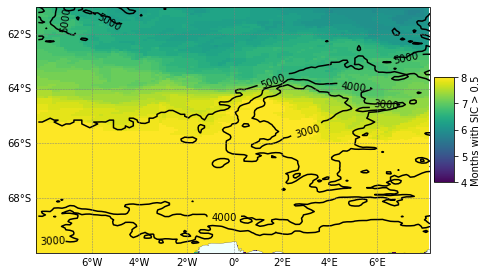

In [155]:
plot_map(sea_ice_months, vmin=4, vmax=8, cmap="viridis", colorbar_unit="Months with SIC > 0.5", save=True,
        savename="./Images/months_SIC_gt_05.png")

Compute the number of months with sea ice greater than 75% sea ice concentration:

In [152]:
sea_ice_months = (ds_mr["SIarea"].where(ds_mr["SIarea"] > 0.75).count("time") / (6*2) )
#divide by the number of time steps to equal 1 month (6), and the total number of years (6)

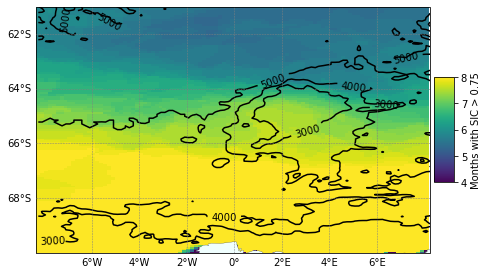

In [153]:
plot_map(sea_ice_months, vmin=4, vmax=8, cmap="viridis", colorbar_unit="Months with SIC > 0.75", save=True,
        savename="./Images/months_SIC_gt_75.png")

Regions with fewer months with sea ice lie on the north and north east of Maud Rise. Maud Rise is the region enclosed by the 3,000m isobath in the center of the plot.

### Find the depth of the CDW isopycnals

In [125]:
surfaces = [27.67, 27.74] # two sigma surfaces considered here corresponding to the top and the core of CDW layer
tol = 0.02
i=0

sigma_surface = ds_mr["sigma"].where( (ds_mr["sigma"] > surfaces[i]-tol) & 
                                                        (ds_mr["sigma"] < surfaces[i]+tol)).compute()

sigma_surface_depth_2767 = ma.masked_array(np.ones(sigma_surface.shape) \
                                      * np.array([[ds_mr.Z.values]]).T,
                                            mask = np.isnan(sigma_surface) ).mean(axis=1)

i = 1
sigma_surface2 = ds_mr["sigma"].where( (ds_mr["sigma"] > surfaces[i]-tol) & 
                                                        (ds_mr["sigma"] < surfaces[i]+tol)).compute()

sigma_surface_depth_2774 = ma.masked_array(np.ones(sigma_surface2.shape) \
                                      * np.array([[RC]]).T,
                                            mask = np.isnan(sigma_surface2) ).mean(axis=1)



In [126]:
sigma_surface_depth = xr.Dataset({"sigma_surface_depth":([ "sigma", "time", "YC", "XC"], 
                                ma.concatenate([sigma_surface_depth_2767[np.newaxis,...],
                                                sigma_surface_depth_2774[np.newaxis,...]]))},
                                coords={"sigma":(["sigma"], [27.67, 27.74]),
                                        "time":(["time"], ds_mr.time.values),
                                        "YC":(["YC"], ds_mr.YC.values),
                                        "XC":(["XC"], ds_mr.XC.values) })

Depth of the $\sigma = 27.67$ kg/m$^3$ isopycnal during the month of February

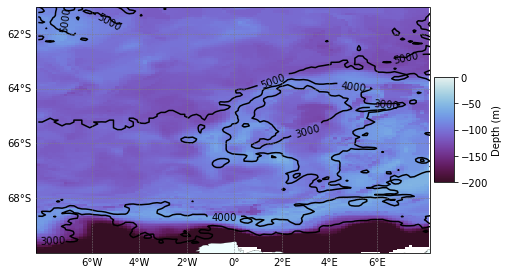

In [158]:
isopyc2767_febDepth = sigma_surface_depth["sigma_surface_depth"].\
sel(time = sigma_surface_depth.time.dt.month.isin([2])).isel(sigma=0).mean("time")

plot_map(isopyc2767_febDepth, vmin=-200, vmax=0, cmap=cmo.dense_r, 
         colorbar_unit="Depth (m)", save=True,
        savename="./Images/isopyc2767_FebDepth.png")

Depth of the $\sigma = 27.74$ kg/m$^3$ isopycnal during the month of February

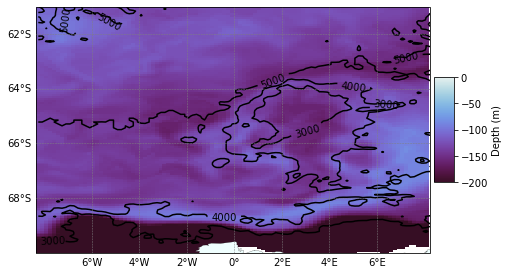

In [160]:
isopyc2774_febDepth = sigma_surface_depth["sigma_surface_depth"].\
sel(time = sigma_surface_depth.time.dt.month.isin([2])).sel(sigma=27.74).mean("time")

plot_map(isopyc2774_febDepth, vmin=-200, vmax=0, cmap=cmo.dense_r, 
         colorbar_unit="Depth (m)", save=True,
        savename="./Images/isopyc2774_FebDepth.png")

Depth of the $\sigma = 27.67$ kg/m$^3$ isopycnal during the month of September

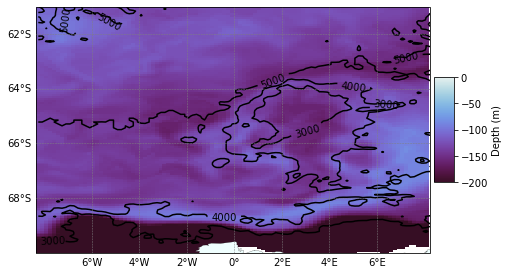

In [161]:
isopyc2767_SepDepth = sigma_surface_depth["sigma_surface_depth"].\
sel(time = sigma_surface_depth.time.dt.month.isin([9])).sel(sigma=27.67).mean("time")

plot_map(isopyc2774_febDepth, vmin=-200, vmax=0, cmap=cmo.dense_r, 
         colorbar_unit="Depth (m)", save=True,
        savename="./Images/isopyc2767_SepDepth.png")

Depth of the $\sigma = 27.74$ kg/m$^3$ isopycnal during the month of September

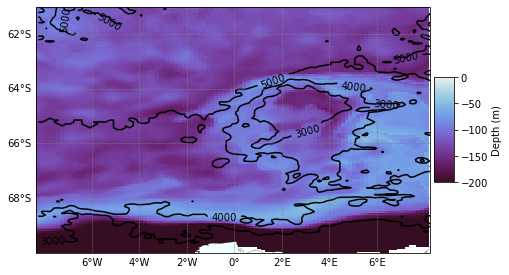

In [163]:
isopyc2774_SepDepth = sigma_surface_depth["sigma_surface_depth"].\
sel(time = sigma_surface_depth.time.dt.month.isin([9])).sel(sigma=27.74).mean("time")

plot_map(isopyc2774_SepDepth, vmin=-200, vmax=0, cmap=cmo.dense_r, 
         colorbar_unit="Depth (m)", save=True,
        savename="./Images/isopyc2774_SepDepth.png")

In [137]:
grid_MR = Grid(ds_mr.sel(time_inner=slice("2013", "2014")), periodic="None", metrics=metrics,
                  boundary={"X":"extrapolate", "Y":"extrapolate", "Z":"extrapolate","T":"extend"} )


Compute the vertically averaged zonal and meridional velocities (ug, vg) as proxies for the geostrophic velocities.

In [139]:
ug = grid_MR.interp(grid_MR.average(ds_mr["UVEL"] * ds_mr["hFacW"]/ds_mr["hFacW"], "Z"), "X")
vg = grid_MR.interp(grid_MR.average(ds_mr["VVEL"] * ds_mr["hFacS"]/ds_mr["hFacS"], "Z"), "Y")

In [143]:
U = np.sqrt(ug**2 + vg**2) # current speed U

Current speed averaged over February

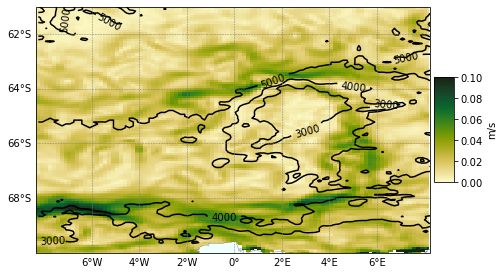

In [146]:
plot_map(np.abs(U).sel(time = U.time.dt.month.isin([2])).mean("time"), vmin=0, vmax=0.1, cmap=cmo.speed, 
         colorbar_unit="m/s", save=True,
        savename="./Images/currents_Feb.png")

Current speed averaged over September

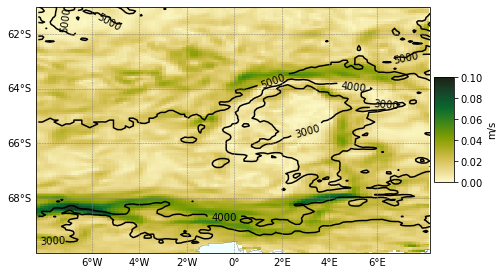

In [147]:
plot_map(np.abs(U).sel(time = U.time.dt.month.isin([9])).mean("time"), vmin=0, vmax=0.1, cmap=cmo.speed, 
         colorbar_unit="m/s", save=True,
        savename="./Images/currents_Sep.png")